## Question 02

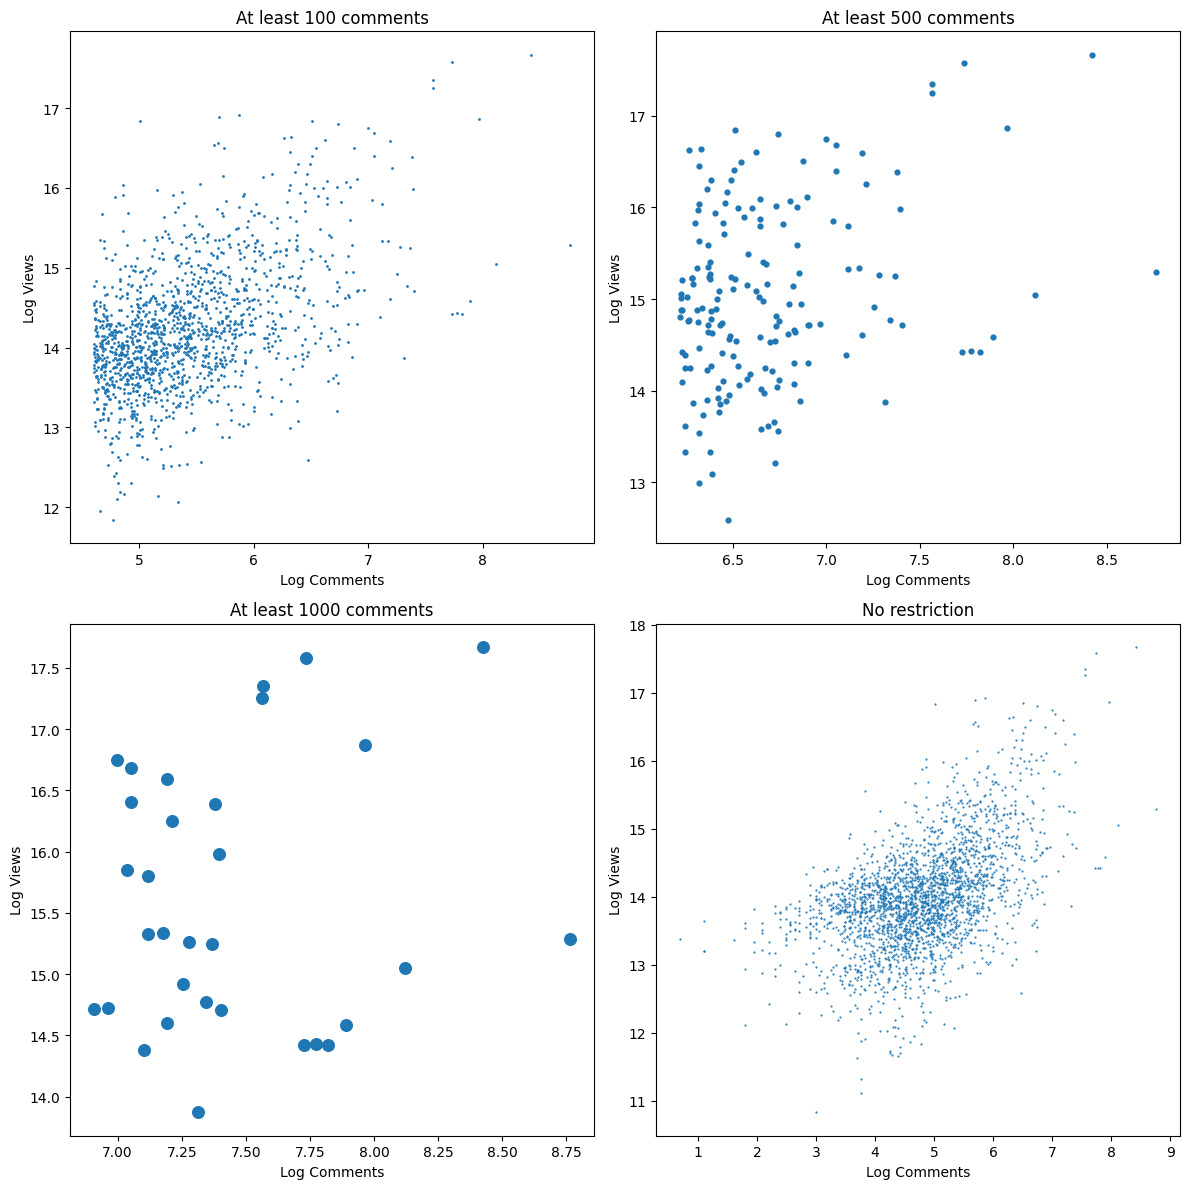

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset_url = "https://raw.githubusercontent.com/cpethe/TED_Talks/master/ted_main.csv"
ted_main = pd.read_csv(dataset_url)

# Filtered data points with copies
four_sets_of_data_points = [
    ted_main[ted_main['comments'] >= 100].copy(),
    ted_main[ted_main['comments'] >= 500].copy(),
    ted_main[ted_main['comments'] >= 1000].copy(),
    ted_main.copy()
]

# Log-transformed values
for data_points in four_sets_of_data_points:
    data_points['log_comments'] = np.log(data_points['comments'])
    data_points['log_views'] = np.log(data_points['views'])

# Scatter plot
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# [(row, column, min_comments, max_comments, title, scatter_size)]
subplot_properties = [
    # With so many data points, we need to reduce the size significantly
    (1, 1, 0, 0, 'No restriction', .3),
    # With so few data points, we should make use of the available space to emphasize the data
    (1, 0, 1000, 0, 'At least 1000 comments', 70), 
    # Scale down the scatter size to about the same change in data point magnitude
    (0, 1, 500, 1000, 'At least 500 comments', 12),
    (0, 0, 100, 500, 'At least 100 comments', 1),
]

for row, column, min_comments, max_comments, title, scatter_size in subplot_properties:
    data_points = four_sets_of_data_points[row * 2 + column]
    axs[row, column].scatter(data_points['log_comments'], data_points['log_views'], s=scatter_size)
    axs[row, column].set_title(title)
    axs[row, column].set_xlabel('Log Comments')
    axs[row, column].set_ylabel('Log Views')

plt.tight_layout()
plt.show()

## Question 03

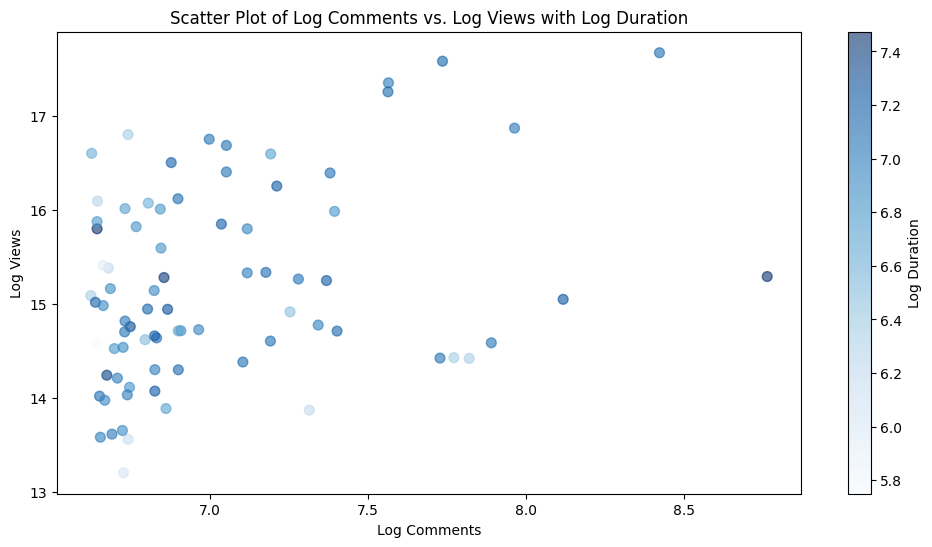

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset_url = "https://raw.githubusercontent.com/cpethe/TED_Talks/master/ted_main.csv"
ted_main = pd.read_csv(dataset_url)

# Filtered data points with copies
data_points = ted_main[ted_main['comments'] >= 750].copy()

# Log-transformed values
data_points['log_comments'] = np.log(data_points['comments'])
data_points['log_views'] = np.log(data_points['views'])
data_points['log_duration'] = np.log(data_points['duration'])

# Scatter plot
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    data_points['log_comments'], 
    data_points['log_views'], 
    c=data_points['log_duration'], 
    cmap='Blues', # Colormaps: viridis, plasma, inferno, magma
    s=50,
    alpha=0.6
)
plt.colorbar(scatter, label='Log Duration')
plt.xlabel('Log Comments')
plt.ylabel('Log Views') 
plt.title('Scatter Plot of Log Comments vs. Log Views with Log Duration')

plt.show()

## Question 04

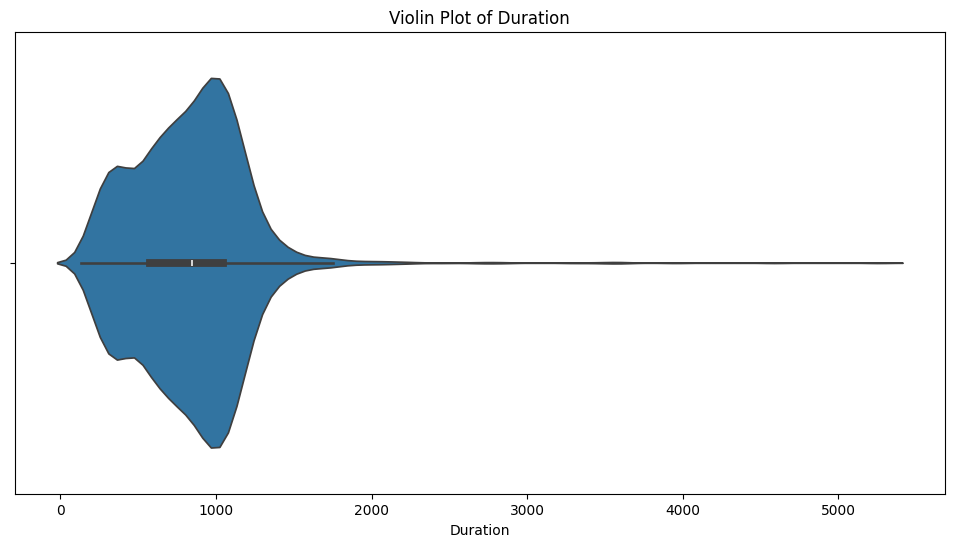

In [42]:
import seaborn as sns
import pandas as pd

dataset_url = "https://raw.githubusercontent.com/cpethe/TED_Talks/master/ted_main.csv"
ted_main = pd.read_csv(dataset_url)

plt.figure(figsize=(12, 6))
sns.violinplot(x=ted_main['duration'])
plt.title('Violin Plot of Duration')
plt.xlabel('Duration')
plt.show()

## Question 05

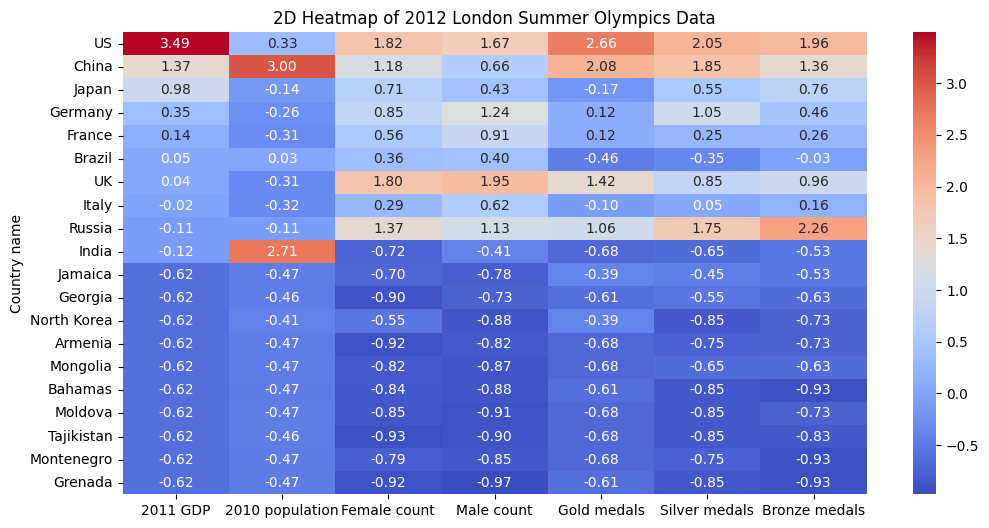

In [43]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
olympics_data = pd.read_csv("https://www.data-manual.com/datafiles/olympics.csv")

# Set the correct column for country names
country_column = 'Country name'

# Copy data, set 'Country name' column as the index, and drop 'ISO country code' column
normalized_olympics_data = olympics_data.copy()
normalized_olympics_data.set_index(country_column, inplace=True)
normalized_olympics_data.drop(columns=['ISO country code'], inplace=True)

# Apply z-score normalization only to numeric columns
for column in normalized_olympics_data.select_dtypes(include=['number']).columns:
    normalized_olympics_data[column] = (normalized_olympics_data[column] - normalized_olympics_data[column].mean()) / normalized_olympics_data[column].std()

# Create a 2D heatmap visualization
plt.figure(figsize=(12, 6))
sns.heatmap(normalized_olympics_data, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('2D Heatmap of 2012 London Summer Olympics Data')
plt.show()


## Question 06

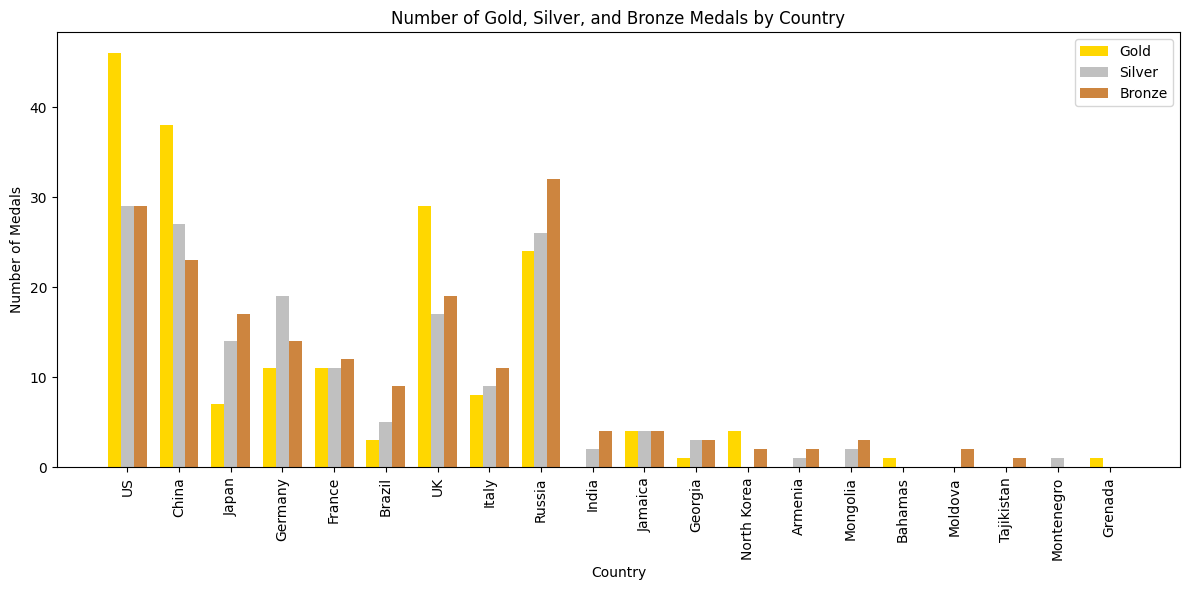

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
olympics_data = pd.read_csv("https://www.data-manual.com/datafiles/olympics.csv")

# Set the correct column for country names
country_column = 'Country name'

# Copy data, set 'Country name' column as the index, and drop 'ISO country code' column
grouped_olympics_data = olympics_data.copy()
grouped_olympics_data.set_index(country_column, inplace=True)
grouped_olympics_data.drop(columns=['ISO country code'], inplace=True)

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
x = range(len(grouped_olympics_data))

# Define the width of each bar
bar_width = 0.25

# Plot the bars for gold, silver, and bronze medals
plt.bar(x, grouped_olympics_data['Gold medals'], width=bar_width, label='Gold', color='gold')
plt.bar([i + bar_width for i in x], grouped_olympics_data['Silver medals'], width=bar_width, label='Silver', color='silver')
plt.bar([i + 2 * bar_width for i in x], grouped_olympics_data['Bronze medals'], width=bar_width, label='Bronze', color='peru')

# Set the x-axis labels to the country names
plt.xticks([i + bar_width for i in x], grouped_olympics_data.index, rotation=90)

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.title('Number of Gold, Silver, and Bronze Medals by Country')
plt.legend()

plt.tight_layout()
plt.show()